In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv(
    "../data/household_power_consumption.txt",
    sep=";",
    na_values="?",
    low_memory=False
)

print(df.shape)
df.head()


(2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df["datetime"] = pd.to_datetime(
    df["Date"] + " " + df["Time"],
    dayfirst=True
)

df.set_index("datetime", inplace=True)
df.drop(["Date", "Time"], axis=1, inplace=True)

df = df.ffill()
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
hourly_df = df.resample("H").mean()

print(hourly_df.shape)
hourly_df.head()


(34589, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [5]:
hourly_df["hour"] = hourly_df.index.hour
hourly_df["day_of_week"] = hourly_df.index.weekday
hourly_df["month"] = hourly_df.index.month
hourly_df["is_weekend"] = hourly_df["day_of_week"].isin([5, 6]).astype(int)

hourly_df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,month,is_weekend
datetime,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5,12,1
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5,12,1
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5,12,1
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5,12,1
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5,12,1


In [6]:
hourly_df["lag_1_hour"] = hourly_df["Global_active_power"].shift(1)
hourly_df["lag_24_hour"] = hourly_df["Global_active_power"].shift(24)

hourly_df.head(30)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,month,is_weekend,lag_1_hour,lag_24_hour
datetime,,,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.000000,0.527778,16.861111,17,5,12,1,NaN,NaN
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.000000,6.716667,16.866667,18,5,12,1,4.222889,NaN
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.000000,1.433333,16.683333,19,5,12,1,3.632200,NaN
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.000000,0.000000,16.783333,20,5,12,1,3.400233,NaN
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.000000,0.416667,17.216667,21,5,12,1,3.268567,NaN
2006-12-16 22:00:00,2.200133,0.056167,238.760000,9.523333,0.000000,0.133333,4.433333,22,5,12,1,3.056467,NaN
2006-12-16 23:00:00,2.061600,0.071433,240.619667,8.896667,0.000000,0.083333,0.000000,23,5,12,1,2.200133,NaN
2006-12-17 00:00:00,1.882467,0.102433,240.961833,8.126667,0.000000,0.466667,0.000000,0,6,12,1,2.061600,NaN
2006-12-17 01:00:00,3.349400,0.136933,240.448333,14.246667,0.000000,25.233333,0.000000,1,6,12,1,1.882467,NaN


In [7]:
hourly_df["rolling_mean_24"] = (
    hourly_df["Global_active_power"].rolling(window=24).mean()
)

hourly_df["rolling_std_24"] = (
    hourly_df["Global_active_power"].rolling(window=24).std()
)

hourly_df.head(30)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,month,is_weekend,lag_1_hour,lag_24_hour,rolling_mean_24,rolling_std_24
datetime,,,,,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.000000,0.527778,16.861111,17,5,12,1,NaN,NaN,NaN,NaN
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.000000,6.716667,16.866667,18,5,12,1,4.222889,NaN,NaN,NaN
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.000000,1.433333,16.683333,19,5,12,1,3.632200,NaN,NaN,NaN
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.000000,0.000000,16.783333,20,5,12,1,3.400233,NaN,NaN,NaN
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.000000,0.416667,17.216667,21,5,12,1,3.268567,NaN,NaN,NaN
2006-12-16 22:00:00,2.200133,0.056167,238.760000,9.523333,0.000000,0.133333,4.433333,22,5,12,1,3.056467,NaN,NaN,NaN
2006-12-16 23:00:00,2.061600,0.071433,240.619667,8.896667,0.000000,0.083333,0.000000,23,5,12,1,2.200133,NaN,NaN,NaN
2006-12-17 00:00:00,1.882467,0.102433,240.961833,8.126667,0.000000,0.466667,0.000000,0,6,12,1,2.061600,NaN,NaN,NaN
2006-12-17 01:00:00,3.349400,0.136933,240.448333,14.246667,0.000000,25.233333,0.000000,1,6,12,1,1.882467,NaN,NaN,NaN


In [8]:
hourly_df["total_sub_metering"] = (
    hourly_df["Sub_metering_1"] +
    hourly_df["Sub_metering_2"] +
    hourly_df["Sub_metering_3"]
)

hourly_df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,month,is_weekend,lag_1_hour,lag_24_hour,rolling_mean_24,rolling_std_24,total_sub_metering
datetime,,,,,,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5,12,1,NaN,NaN,NaN,NaN,17.388889
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5,12,1,4.222889,NaN,NaN,NaN,23.583333
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5,12,1,3.632200,NaN,NaN,NaN,18.116667
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5,12,1,3.400233,NaN,NaN,NaN,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5,12,1,3.268567,NaN,NaN,NaN,17.633333


In [9]:
hourly_df.dropna(inplace=True)

print(hourly_df.shape)


(34565, 16)


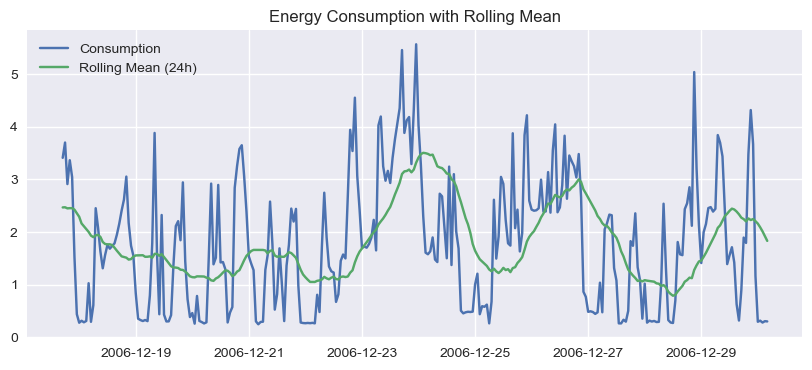

In [10]:
plt.figure(figsize=(10,4))
plt.plot(hourly_df["Global_active_power"][:300], label="Consumption")
plt.plot(hourly_df["rolling_mean_24"][:300], label="Rolling Mean (24h)")
plt.legend()
plt.title("Energy Consumption with Rolling Mean")
plt.show()


In [11]:
X = hourly_df.drop("Global_active_power", axis=1)
y = hourly_df["Global_active_power"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (34565, 15)
y shape: (34565,)


In [12]:
split = int(len(X) * 0.8)

X_train = X.iloc[:split]
X_test  = X.iloc[split:]

y_train = y.iloc[:split]
y_test  = y.iloc[split:]

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (27652, 15)
Test : (6913, 15)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

preds = lr_model.predict(X_test)


In [14]:
mae = mean_absolute_error(y_test, preds)
rmse = mean_squared_error(y_test, preds, squared=False)

print("MAE :", mae)
print("RMSE:", rmse)


MAE : 0.01283300543838164
RMSE: 0.020075255990589923


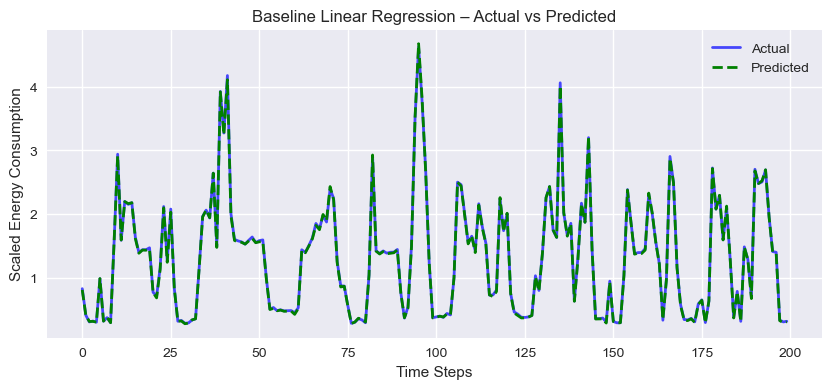

In [16]:
plt.figure(figsize=(10,4))

plt.plot(
    y_test.values[:200],
    label="Actual",
    color="blue",
    linewidth=2,
    alpha=0.7
)

plt.plot(
    preds[:200],
    label="Predicted",
    color="green",
    linestyle="--",
    linewidth=2
)

plt.legend()
plt.title("Baseline Linear Regression – Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Scaled Energy Consumption")
plt.show()


## Final Observations – Milestone 2

- Time-based, lag, and rolling features capture consumption patterns.
- Device-level aggregation improves context awareness.
- Linear Regression provides a strong baseline.
- Results are suitable for comparison with advanced models.
